SAMPLE INFO:
       Sample Condition
0  Kelley_17         C
1  Kelley_18         C
2  Kelley_19         C
3  Kelley_20         C
4  Kelley_21       mut
5  Kelley_22       mut
6  Kelley_23       mut
7  Kelley_24       mut 

Control IDs: ['Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20']
Mutant IDs: ['Kelley_21', 'Kelley_22', 'Kelley_23', 'Kelley_24'] 

Initial shape of read-count table: (32833, 33)
Column headers in read-count table:
 ['gname', 'Kelley_1', 'Kelley_2', 'Kelley_3', 'Kelley_4', 'Kelley_5', 'Kelley_6', 'Kelley_7', 'Kelley_8', 'Kelley_9', 'Kelley_10', 'Kelley_11', 'Kelley_12', 'Kelley_13', 'Kelley_14', 'Kelley_15', 'Kelley_16', 'Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20', 'Kelley_21', 'Kelley_22', 'Kelley_23', 'Kelley_24', 'Kelley_25', 'Kelley_26', 'Kelley_27', 'Kelley_28', 'Kelley_29', 'Kelley_30', 'Kelley_31', 'Kelley_32']

Filtered read-count table dimensions: (25468, 8)
Filtered columns: ['Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20', 'Kelley_21', 'Kelley_2

C:\Users\els851\AppData\Local\Temp\ipykernel_29468\1140889889.py:85: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  my_dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.




PyDESeq2 dataset before DESeq2 run:
 AnnData object with n_obs × n_vars = 8 × 25468
    obs: 'Condition'
    obsm: 'design_matrix'
Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 6.91 seconds.

Fitting dispersion trend curve...
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 10.43 seconds.

Fitting LFCs...
... done in 4.61 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...



PyDESeq2 dataset after DESeq2 run:
 AnnData object with n_obs × n_vars = 8 × 25468
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'


... done in 2.82 seconds.



Log2 fold change & Wald test p-value: Condition mut vs C
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gname                                                                         
AT1G01010    35.485746        0.308731  0.512977  0.601841  0.547280  0.999659
AT1G01020   167.668357        0.063843  0.264234  0.241617  0.809077  0.999659
AT1G01030    11.641470        0.663598  0.828276  0.801180  0.423027  0.993644
AT1G01040   312.759591        0.046118  0.227402  0.202804  0.839288  0.999659
AT1G01050   467.577058        0.094828  0.200453  0.473067  0.636165  0.999659
...                ...             ...       ...       ...       ...       ...
AT5G67600  2289.428878        0.034002  0.193237  0.175963  0.860323  0.999659
AT5G67610    65.055661       -0.354259  0.361243 -0.980666  0.326757  0.982237
AT5G67620   274.197868        0.565568  0.287385  1.967977  0.049071  0.610881
AT5G67630    92.256716        0.618280  0.342825  1.803485  0.071312  0.69

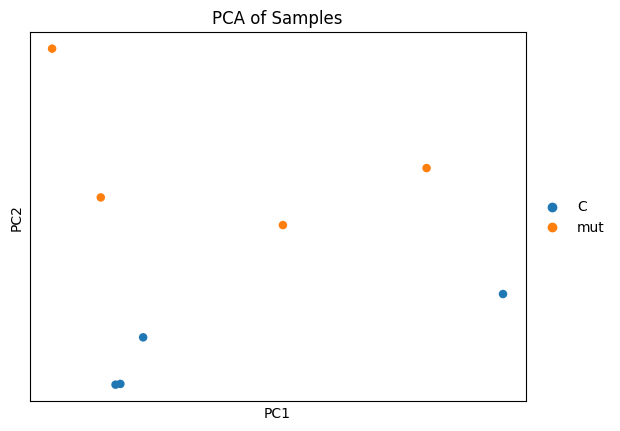

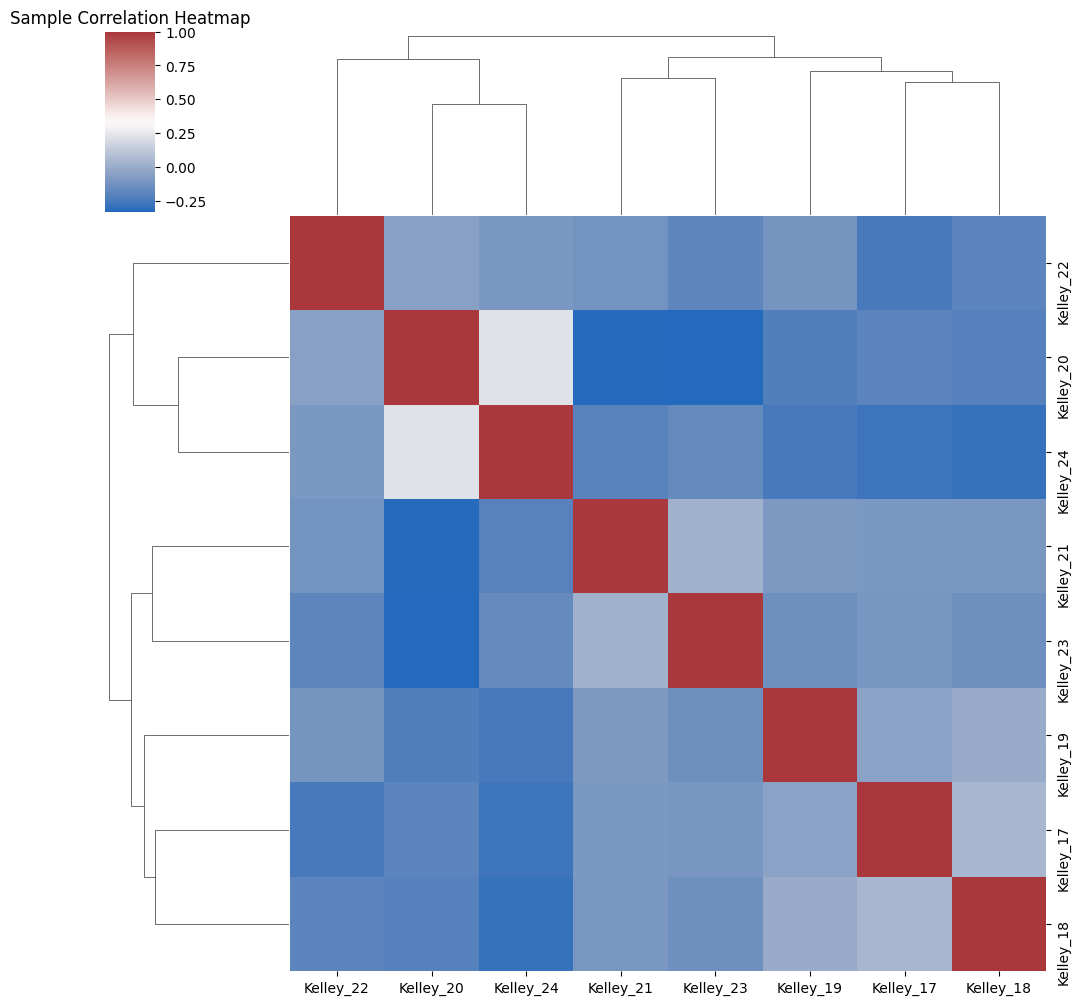

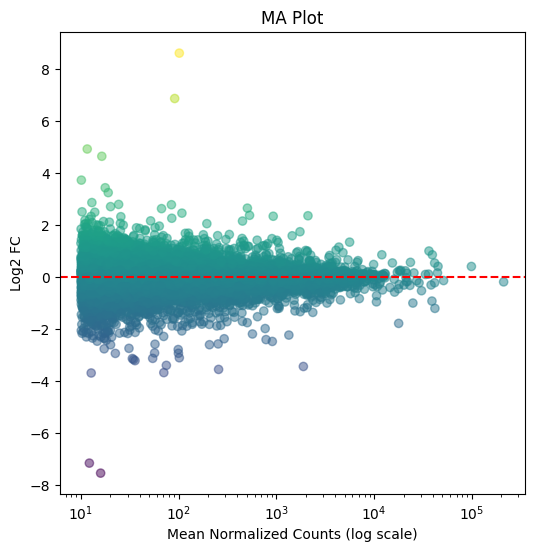

C:\Users\els851\AppData\Local\Temp\ipykernel_29468\1140889889.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns={"Symbol": "symbol"}, inplace=True)


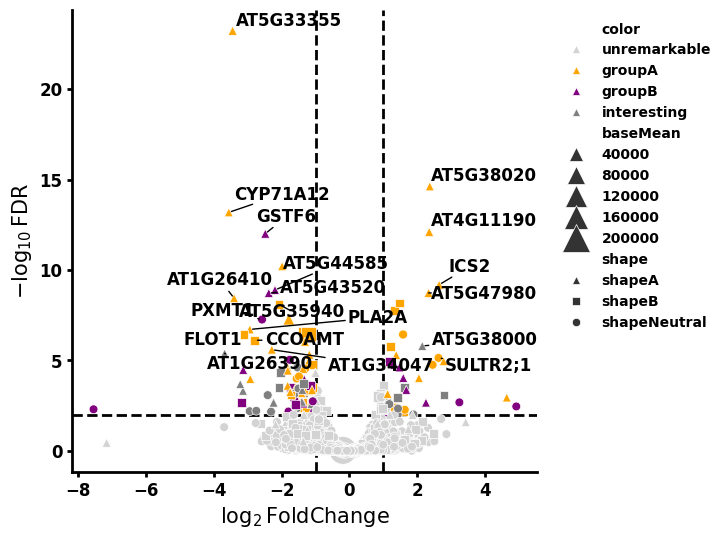


Volcano plot saved as 'volcano.png'.
Total significant genes found: 332


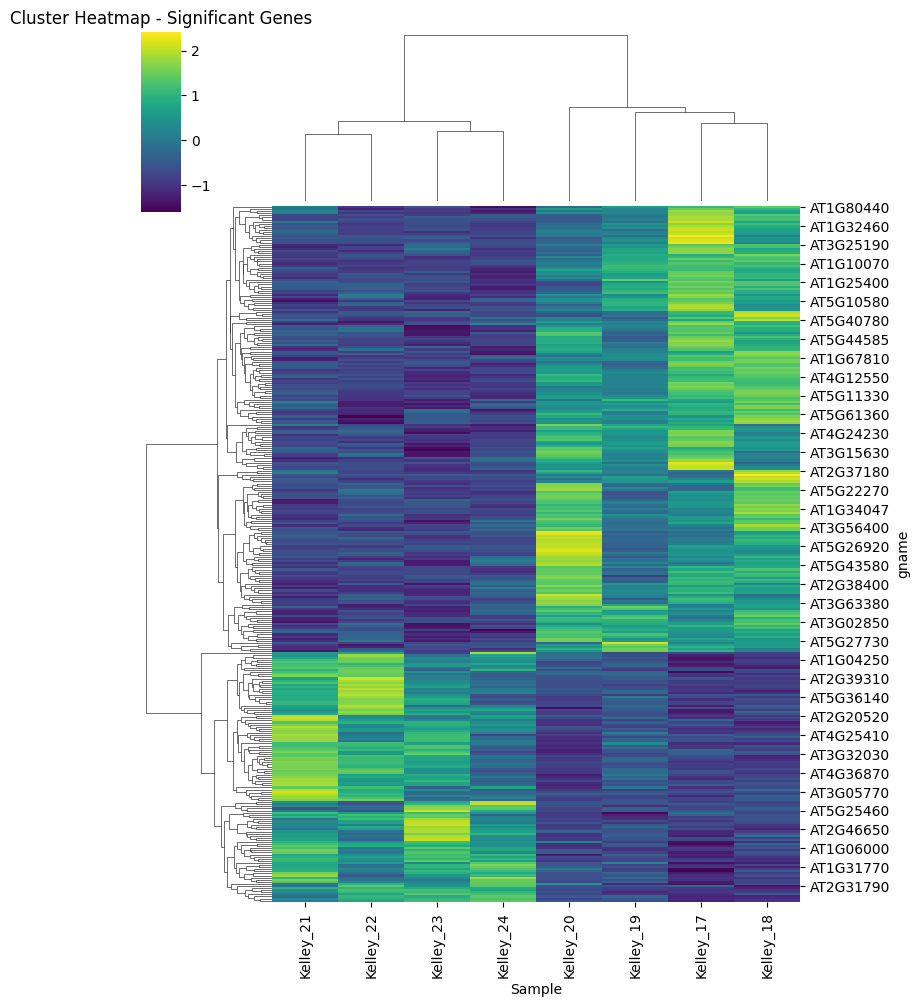

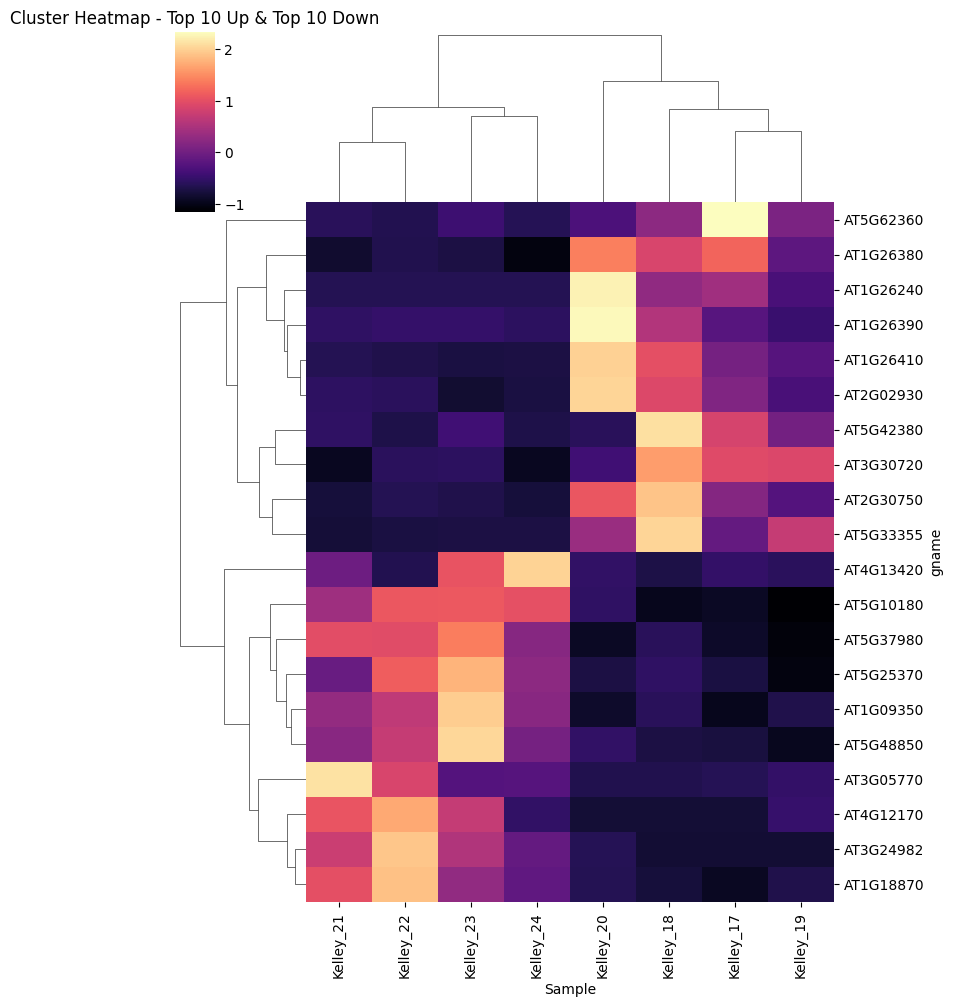

DE results saved to 'DE_results.csv'.


In [1]:
#!/usr/bin/env python3
# coding: utf-8

"""
Sample script for analyzing RNA-seq data using PyDESeq2, Scanpy, and other libraries.

Usage:
    python alt_rna_analysis.py
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import random  # used later for picking random sets of genes

# PyDESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# GSEA
import gseapy as gp
from gseapy.plot import gseaplot

# For label adjustment
from adjustText import adjust_text

#######################################################
# 1. Prepare sample information (metadata)
#######################################################

sample_info_dict = {
    "Sample": ["Kelley_17", "Kelley_18", "Kelley_19", "Kelley_20",
               "Kelley_21", "Kelley_22", "Kelley_23", "Kelley_24"],
    "Condition": ["C", "C", "C", "C",
                  "mut", "mut", "mut", "mut"]
}

sample_info = pd.DataFrame(sample_info_dict)
print("SAMPLE INFO:\n", sample_info, "\n")

# Identify control vs. mutant groups
ctrl_list = sample_info.loc[sample_info['Condition'] == 'C', 'Sample'].tolist()
variant_list = sample_info.loc[sample_info['Condition'] == 'mut', 'Sample'].tolist()
print("Control IDs:", ctrl_list)
print("Mutant IDs:", variant_list, "\n")

#######################################################
# 2. Load and clean up read-count data
#######################################################

read_df = pd.read_csv('read_counts_table.csv')
print("Initial shape of read-count table:", read_df.shape)
print("Column headers in read-count table:\n", list(read_df.columns))

# Make 'gname' column the index
read_df = read_df.set_index('gname')

# Exclude genes with zero total counts
read_df = read_df[read_df.sum(axis=1) > 0]

#######################################################
# 3. Filter columns based on metadata info
#######################################################

all_samples = ctrl_list + variant_list
read_df = read_df[all_samples]
print("\nFiltered read-count table dimensions:", read_df.shape)
print("Filtered columns:", list(read_df.columns))

# Adjust sample_info indexing for DESeq2
sample_info.set_index('Sample', inplace=True)
sample_info["Condition"] = sample_info["Condition"].astype("category")
sample_info["Condition"] = sample_info["Condition"].cat.reorder_categories(["C", "mut"], ordered=True)

#######################################################
# 4. Create DESeqDataSet and run differential analysis
#######################################################

# PyDESeq2 expects samples in rows and genes in columns
transposed_df = read_df.T

my_dds = DeseqDataSet(
    counts=transposed_df,
    metadata=sample_info,
    design_factors=["Condition"]
)

print("\nPyDESeq2 dataset before DESeq2 run:\n", my_dds)

my_dds.deseq2()
print("\nPyDESeq2 dataset after DESeq2 run:\n", my_dds)

#######################################################
# 5. Extract DE outputs
#######################################################

my_stats = DeseqStats(my_dds, contrast=["Condition", "mut", "C"])
stats_summary = my_stats.summary()
results_df = my_stats.results_df

print("\nHead of DE outputs:\n", results_df.head())

#######################################################
# 6. Merge annotation details
#######################################################

gene_info = pd.read_csv('Arabidopsis_gene_annotation.tsv', sep='\t')
gene_info.set_index('Nomenclature ID', inplace=True)

# Example: filter out rows without symbols
gene_info['check_symbol'] = gene_info['Symbol'].index.isnull()
gene_info = gene_info.loc[gene_info['check_symbol'] == False]

complete_df = pd.merge(
    left=results_df,
    right=gene_info,
    how="inner",
    left_index=True,
    right_index=True
)

# Incorporate Symbol into results_df
results_df['Symbol'] = complete_df['Symbol']

# Filter out low-expression genes
results_df = results_df[results_df.baseMean >= 10]

# Find significant genes
significant_hits = results_df[(results_df.padj < 0.1) & (abs(results_df.log2FoldChange) > 0.5)]
print("\nSignificant Genes:\n", significant_hits)

#######################################################
# 7. Exploratory data analysis with Scanpy
#######################################################

try:
    norm_data = my_dds.layers["normed_counts"]
except AttributeError:
    print("\n[Note] 'my_dds.layers[\"normed_counts\"]' not found. Check PyDESeq2 docs.")
    norm_data = None

if norm_data is not None:
    # Build AnnData object
    adata = anndata.AnnData(X=norm_data, obs=my_dds.obs, var=pd.DataFrame(index=my_dds.var.index))
    adata.layers["counts"] = norm_data
    adata.layers["log1p"] = np.log1p(norm_data)

    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata)
    sc.pl.pca(adata, color='Condition', size=150, show=False)
    plt.title("PCA of Samples")
    plt.show()

    # Distance Heatmap
    corr_mat = np.corrcoef(norm_data)
    sns.clustermap(
        corr_mat,
        row_cluster=True, col_cluster=True,
        cmap="vlag",
        xticklabels=adata.obs.index, yticklabels=adata.obs.index
    )
    plt.title("Sample Correlation Heatmap")
    plt.show()

    # MA Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(
        x=results_df['baseMean'],
        y=results_df['log2FoldChange'],
        c=results_df['log2FoldChange'],
        alpha=0.5,
        cmap='viridis'
    )
    plt.xscale('log')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Mean Normalized Counts (log scale)")
    plt.ylabel("Log2 FC")
    plt.title("MA Plot")
    plt.show()

#######################################################
# Volcano Plot Section
#######################################################

results_df.rename(columns={"Symbol": "symbol"}, inplace=True)
results_df = results_df.dropna(subset=["padj", "symbol", "log2FoldChange", "baseMean"])
results_df["nlog10"] = -np.log10(results_df["padj"])

# Random picks for color categories
picked_set1 = random.choices(results_df.symbol.tolist(), weights=results_df.nlog10.tolist(), k=250)
picked_set2 = random.choices(results_df.symbol.tolist(), weights=results_df.nlog10.tolist(), k=300)
picked_set2 = [x for x in picked_set2 if x not in picked_set1]

def assign_color(row):
    fold_change, gene_symbol, minuslog10 = row
    if abs(fold_change) < 1 or minuslog10 < 2:
        return "unremarkable"
    if gene_symbol in picked_set1:
        return "groupA"
    if gene_symbol in picked_set2:
        return "groupB"
    return "interesting"

results_df["color"] = results_df[["log2FoldChange", "symbol", "nlog10"]].apply(assign_color, axis=1)

picked_set3 = random.choices(results_df.symbol.tolist(), weights=results_df.nlog10.tolist(), k=250)
picked_set4 = random.choices(results_df.symbol.tolist(), weights=results_df.nlog10.tolist(), k=300)
picked_set4 = [x for x in picked_set4 if x not in picked_set3]

def assign_shape(gsym):
    if gsym in picked_set3:
        return "shapeA"
    if gsym in picked_set4:
        return "shapeB"
    return "shapeNeutral"

results_df["shape"] = results_df.symbol.map(assign_shape)

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(
    data=results_df,
    x="log2FoldChange",
    y="nlog10",
    hue="color",
    hue_order=["unremarkable", "groupA", "groupB", "interesting"],
    palette=["lightgrey", "orange", "purple", "grey"],
    style="shape",
    style_order=["shapeA", "shapeB", "shapeNeutral"],
    markers=["^", "s", "o"],
    size="baseMean",
    sizes=(40, 400)
)

ax.axhline(2, zorder=0, c="k", lw=2, ls="--")
ax.axvline(1, zorder=0, c="k", lw=2, ls="--")
ax.axvline(-1, zorder=0, c="k", lw=2, ls="--")

# Label highly significant points
label_texts = []
for idx in range(len(results_df)):
    myrow = results_df.iloc[idx]
    if myrow.nlog10 > 5 and abs(myrow.log2FoldChange) > 2:
        label_texts.append(
            plt.text(
                x=myrow.log2FoldChange,
                y=myrow.nlog10,
                s=myrow.symbol,
                fontsize=12, weight="bold"
            )
        )

adjust_text(label_texts, arrowprops=dict(arrowstyle="-", color="k"))

plt.legend(loc=1, bbox_to_anchor=(1.4, 1), frameon=False, prop={"weight": "bold"})

for border in ["bottom", "left"]:
    ax.spines[border].set_linewidth(2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(width=2)

plt.xticks(size=12, weight="bold")
plt.yticks(size=12, weight="bold")
plt.xlabel("$\\log_{2}$FoldChange", size=15)
plt.ylabel("$-\\log_{10}$FDR", size=15)

plt.savefig("volcano.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("\nVolcano plot saved as 'volcano.png'.")

##########################################################
# Final steps: Summaries, heatmaps, and saving results
##########################################################

# A) Identify significant hits again
significant_hits = results_df[(results_df["padj"] < 0.1) & (abs(results_df["log2FoldChange"]) > 0.5)].copy()
if len(significant_hits) == 0:
    print("No genes match significance criteria.")
else:
    print(f"Total significant genes found: {len(significant_hits)}")

# B) Take top 10 up and top 10 down from significant group
top_up10 = significant_hits.sort_values("log2FoldChange", ascending=False).head(10)
top_down10 = significant_hits.sort_values("log2FoldChange", ascending=True).head(10)
highlighted_genes = list(top_up10.index) + list(top_down10.index)

# C) Extract normalized counts for heatmap
try:
    norm_data = my_dds.layers["normed_counts"]
except AttributeError:
    raise ValueError("Could not locate 'my_dds.layers[\"normed_counts\"]'. "
                     "Verify your PyDESeq2 version includes normalized counts.")

norm_data_df = pd.DataFrame(
    data=norm_data,
    index=my_dds.obs_names,
    columns=my_dds.var.index
)

##########################################################
# HEATMAP A: All significantly altered genes
##########################################################
if len(significant_hits) > 0:
    sign_data_df = norm_data_df[significant_hits.index]
    sns.clustermap(sign_data_df.T, z_score=0, cmap="viridis", figsize=(8, 10))
    plt.title("Cluster Heatmap - Significant Genes")
    plt.savefig("heatmap_all_sig_genes.png", dpi=300, bbox_inches="tight")
    plt.show()

##########################################################
# HEATMAP B: Top 20 (10 up, 10 down)
##########################################################
if len(highlighted_genes) > 0:
    top_data_df = norm_data_df[highlighted_genes]
    sns.clustermap(top_data_df.T, z_score=0, cmap="magma", figsize=(8, 10))
    plt.title("Cluster Heatmap - Top 10 Up & Top 10 Down")
    plt.savefig("heatmap_top20_up_down.png", dpi=300, bbox_inches="tight")
    plt.show()

##########################################################
# Save the final DE results
##########################################################
results_df.to_csv("DE_results.csv")
print("DE results saved to 'DE_results.csv'.")